<a href="https://colab.research.google.com/github/AbdurRahmaneee/machine_learning_projects/blob/main/Copy_of_03_introduction_to_computer_vision_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduciton to convolutional neural networks and computer vision with tensorflow

compputer vision is the pracitce of writing algorithm which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front

## Get the data

The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/datasets/dansbecker/food-101

however we've modified it to only use two classes (pizza & steak) using image data modification notebook: extras/image_data_modification.ipynb

> We start with small dataset so we can experiment what works (or better yet what doesn't work) before scaling up.

In [5]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-09-04 19:06:13--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.164.144, 172.253.62.128, 142.251.163.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.164.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   268MB/s    in 0.4s    

2022-09-04 19:06:13 (268 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



 ## Inspect the data (become one with it)

 A very crucial step at the beginning of any machine learning project is becoming one with the data. And for a computer vision project... this usually means visualizing many samples of your data.




In [6]:
!ls pizza_steak

test  train


In [7]:
!ls pizza_steak/train/

pizza  steak


In [8]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [9]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directoris and {len(filenames)} images in '{dirpath}'.")


There are 2 directoris and 0 images in 'pizza_steak'.
There are 2 directoris and 0 images in 'pizza_steak/test'.
There are 0 directoris and 250 images in 'pizza_steak/test/steak'.
There are 0 directoris and 250 images in 'pizza_steak/test/pizza'.
There are 2 directoris and 0 images in 'pizza_steak/train'.
There are 0 directoris and 750 images in 'pizza_steak/train/steak'.
There are 0 directoris and 750 images in 'pizza_steak/train/pizza'.


In [10]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Sep  4 19:06 .
drwxr-xr-x 1 root root 4096 Sep  4 19:06 ..
drwxr-xr-x 4 root root 4096 Sep  4 19:06 test
drwxr-xr-x 4 root root 4096 Sep  4 19:06 train


In [11]:
# another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [12]:
os.listdir("pizza_steak/train/steak")

['3438319.jpg',
 '2514432.jpg',
 '2988960.jpg',
 '3100476.jpg',
 '2614189.jpg',
 '745189.jpg',
 '3670607.jpg',
 '606820.jpg',
 '802348.jpg',
 '317206.jpg',
 '3777020.jpg',
 '1392718.jpg',
 '2500292.jpg',
 '1230968.jpg',
 '3536023.jpg',
 '3159818.jpg',
 '560503.jpg',
 '1941807.jpg',
 '2568848.jpg',
 '1362989.jpg',
 '165639.jpg',
 '60655.jpg',
 '2081995.jpg',
 '1327567.jpg',
 '401094.jpg',
 '331860.jpg',
 '217996.jpg',
 '461187.jpg',
 '2324994.jpg',
 '339891.jpg',
 '1684438.jpg',
 '1623325.jpg',
 '2855315.jpg',
 '3008192.jpg',
 '2193684.jpg',
 '2154779.jpg',
 '2495903.jpg',
 '168006.jpg',
 '3253588.jpg',
 '1400760.jpg',
 '2437268.jpg',
 '2395127.jpg',
 '937133.jpg',
 '534633.jpg',
 '184110.jpg',
 '1829045.jpg',
 '1413972.jpg',
 '564530.jpg',
 '1264154.jpg',
 '1241193.jpg',
 '2826987.jpg',
 '3417789.jpg',
 '295491.jpg',
 '1395906.jpg',
 '296268.jpg',
 '165964.jpg',
 '2615718.jpg',
 '3466159.jpg',
 '910672.jpg',
 '2017387.jpg',
 '2499364.jpg',
 '114601.jpg',
 '1942333.jpg',
 '3578934.jpg',

To visualize our images, first let's get the class names programmatically.


In [13]:
# Get the classanames programatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [14]:
sorted([item.name for item in data_dir.glob("*")])

['pizza', 'steak']

In [15]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images form here)
  target_folder = target_dir+ target_class
  print(target_folder)
  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)
  
  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0]) 
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shaspe of the image
  return img





pizza_steak/train/pizza
['3063955.jpg']
Image shape: (512, 512, 3)


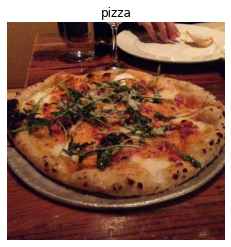

In [16]:
# View a random image from the trianing dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

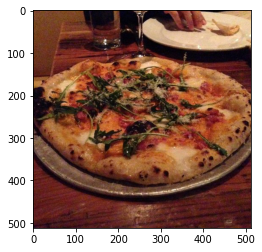

In [17]:
plt.imshow(img)

In [18]:

img.dtype

dtype('uint8')

In [19]:
img

array([[[130,  74,  25],
        [128,  72,  23],
        [142,  86,  39],
        ...,
        [199, 145, 107],
        [200, 146, 108],
        [206, 150, 115]],

       [[131,  75,  28],
        [121,  64,  19],
        [129,  72,  29],
        ...,
        [211, 157, 119],
        [214, 160, 124],
        [214, 160, 124]],

       [[128,  73,  32],
        [116,  61,  20],
        [119,  64,  25],
        ...,
        [219, 167, 130],
        [221, 167, 131],
        [213, 159, 125]],

       ...,

       [[ 35,  19,  32],
        [ 28,  12,  25],
        [ 28,  10,  26],
        ...,
        [ 82,  30,  34],
        [ 80,  28,  32],
        [ 72,  20,  24]],

       [[ 30,  18,  32],
        [ 28,  14,  29],
        [ 33,  16,  32],
        ...,
        [ 75,  25,  28],
        [ 76,  26,  29],
        [ 67,  17,  20]],

       [[ 26,  15,  31],
        [ 27,  14,  31],
        [ 36,  22,  39],
        ...,
        [ 65,  16,  19],
        [ 76,  27,  31],
        [ 78,  29,  33]]

In [20]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[130,  74,  25],
        [128,  72,  23],
        [142,  86,  39],
        ...,
        [199, 145, 107],
        [200, 146, 108],
        [206, 150, 115]],

       [[131,  75,  28],
        [121,  64,  19],
        [129,  72,  29],
        ...,
        [211, 157, 119],
        [214, 160, 124],
        [214, 160, 124]],

       [[128,  73,  32],
        [116,  61,  20],
        [119,  64,  25],
        ...,
        [219, 167, 130],
        [221, 167, 131],
        [213, 159, 125]],

       ...,

       [[ 35,  19,  32],
        [ 28,  12,  25],
        [ 28,  10,  26],
        ...,
        [ 82,  30,  34],
        [ 80,  28,  32],
        [ 72,  20,  24]],

       [[ 30,  18,  32],
        [ 28,  14,  29],
        [ 33,  16,  32],
        ...,
        [ 75,  25,  28],
        [ 76,  26,  29],
        [ 67,  17,  20]],

       [[ 26,  15,  31],
        [ 27,  14,  31],
        [ 36,  22,  39],
        ...,
        [ 65,  16,  1

In [21]:
# view the image shape
img.shape # returns width, height, colour channels

(512, 512, 3)

In [22]:
# Get all the pixel values between 0 and 1
img/255.

array([[[0.50980392, 0.29019608, 0.09803922],
        [0.50196078, 0.28235294, 0.09019608],
        [0.55686275, 0.3372549 , 0.15294118],
        ...,
        [0.78039216, 0.56862745, 0.41960784],
        [0.78431373, 0.57254902, 0.42352941],
        [0.80784314, 0.58823529, 0.45098039]],

       [[0.51372549, 0.29411765, 0.10980392],
        [0.4745098 , 0.25098039, 0.0745098 ],
        [0.50588235, 0.28235294, 0.11372549],
        ...,
        [0.82745098, 0.61568627, 0.46666667],
        [0.83921569, 0.62745098, 0.48627451],
        [0.83921569, 0.62745098, 0.48627451]],

       [[0.50196078, 0.28627451, 0.1254902 ],
        [0.45490196, 0.23921569, 0.07843137],
        [0.46666667, 0.25098039, 0.09803922],
        ...,
        [0.85882353, 0.65490196, 0.50980392],
        [0.86666667, 0.65490196, 0.51372549],
        [0.83529412, 0.62352941, 0.49019608]],

       ...,

       [[0.1372549 , 0.0745098 , 0.1254902 ],
        [0.10980392, 0.04705882, 0.09803922],
        [0.10980392, 0

## An end-to-end example 

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data


In [23]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Preprocessing the data (get all  of the pixel values between 0 & 1, also called scalling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")

])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 23s 210ms/step - loss: 0.5587 - accuracy: 0.6853 - val_loss: 0.3906 - val_accuracy: 0.8480
Epoch 2/5
47/47 [==============================] - 10s 222ms/step - loss: 0.4071 - accuracy: 0.8113 - val_loss: 0.3524 - val_accuracy: 0.8560
Epoch 3/5
47/47 [==============================] - 9s 196ms/step - loss: 0.3823 - accuracy: 0.8340 - val_loss: 0.3268 - val_accuracy: 0.8700
Epoch 4/5
47/47 [==============================] - 10s 219ms/step - loss: 0.3434 - accuracy: 0.8473 - val_loss: 0.3039 - val_accuracy: 0.8700
Epoch 5/5
47/47 [==============================] - 9s 194ms/step - loss: 0.3042 - accuracy: 0.8793 - val_loss: 0.3057 - val_accuracy: 0.8720


## Using the ssame model as before

Lets replicate the model we've built in a previous section to see if it works with our image data.

The model we're building is from the [TensorFlow playground](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=4,4&seed=0.09362&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

In [24]:
# Set random seed

tf.random.set_seed(42)

# Create a model to replicate the TensorFlow playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
]) 

# Complie the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 184ms/step - loss: 0.7026 - accuracy: 0.4980 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 178ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 178ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 177ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 196ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [25]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Depite having 20x more parameters than our CNN (model_1), model_2 perdorms terribly.. let't try to improve it

In [26]:
# SEt random seed
tf.random.set_seed(42)

# Create the model (same as above let's step it up a notch)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 9s 182ms/step - loss: 3.0351 - accuracy: 0.6727 - val_loss: 1.3397 - val_accuracy: 0.6400
Epoch 2/5
47/47 [==============================] - 8s 176ms/step - loss: 0.9492 - accuracy: 0.7327 - val_loss: 0.5353 - val_accuracy: 0.7840
Epoch 3/5
47/47 [==============================] - 8s 177ms/step - loss: 0.8629 - accuracy: 0.7327 - val_loss: 0.5240 - val_accuracy: 0.7820
Epoch 4/5
47/47 [==============================] - 8s 178ms/step - loss: 0.7350 - accuracy: 0.7493 - val_loss: 0.6503 - val_accuracy: 0.7700
Epoch 5/5
47/47 [==============================] - 8s 177ms/step - loss: 0.4846 - accuracy: 0.8040 - val_loss: 1.1910 - val_accuracy: 0.5740


In [27]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,063,101
Trainable params: 15,063,101
Non-trainable params: 0
_________________________________________________________________


In [28]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Binary Classification: Let's break it down.

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepare it for our model, the main step here was scalling/ normaililzing)
3. Created a model (start with a basaline).
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied(experiment, experiment, experiment)


### 1. Become one with the data

pizza_steak/train/steak
['2532239.jpg']
Image shape: (384, 512, 3)
pizza_steak/train/pizza
['1243215.jpg']
Image shape: (341, 512, 3)


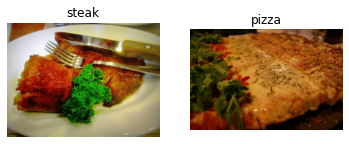

In [29]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

In [30]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into batches

A batch is a small subset of data. Rather than look at all -10,000 images at one time, a model only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 imaeges (or more) might not fit into the memor of your processor (GPU)
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?
because 32 is good for your health...

In [31]:
!nvidia-smi

Sun Sep  4 19:08:52 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P0    30W /  70W |   2348MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [32]:
# Create and test data generatioin and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


In [33]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               batch_size=32)
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [34]:
# Get a sample of a training data batch
images, labels = train_data.next() # get the "next" batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [35]:
# How many batches are there?
len(train_data)

47

In [36]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [37]:
images[7].shape

(224, 224, 3)

In [38]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

# 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing resutl that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

> **Note:** In deep learning, there is almost infinite amount of architecture 

In [39]:
# Make the creating of our model little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

# Create the model (this will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
    Conv2D(filters=10, # filters is the number of sliding windows going across an input (higher = more complex model)
           kernel_size=3, # the size of the sliding window going across an input
           strides=1,  # the size of the step the sliding window takes across an input
           padding="valid", # if "same" output shape is same as input shape, if "valid" output shape gets compressed
           activation="relu",
           input_shape=(224, 224, 3)), # input layer (specify the input shape)
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # output layer (working with binary classification as only 1 output neuron)
])



In [40]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])


In [41]:
# Get a summary of our model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_7 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model


In [42]:
# Check the length of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [43]:
# Fit the model
history_4 = model_4.fit(train_data, # It is combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 200ms/step - loss: 0.9692 - accuracy: 0.6327 - val_loss: 0.5327 - val_accuracy: 0.7380
Epoch 2/5
47/47 [==============================] - 9s 195ms/step - loss: 0.5358 - accuracy: 0.7500 - val_loss: 0.5992 - val_accuracy: 0.6660
Epoch 3/5
47/47 [==============================] - 9s 193ms/step - loss: 0.4621 - accuracy: 0.8053 - val_loss: 0.4244 - val_accuracy: 0.8140
Epoch 4/5
47/47 [==============================] - 9s 194ms/step - loss: 0.3554 - accuracy: 0.8500 - val_loss: 0.3797 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 10s 213ms/step - loss: 0.2330 - accuracy: 0.9220 - val_loss: 0.4147 - val_accuracy: 0.8280


In [44]:
model_1.evaluate(test_data)

16/16 [==============================] - 2s 137ms/step - loss: 0.3057 - accuracy: 0.8720


[0.3057357966899872, 0.871999979019165]

In [45]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

### 5. Evaluating our model
It looks like our model is learning something, let's evaluate it


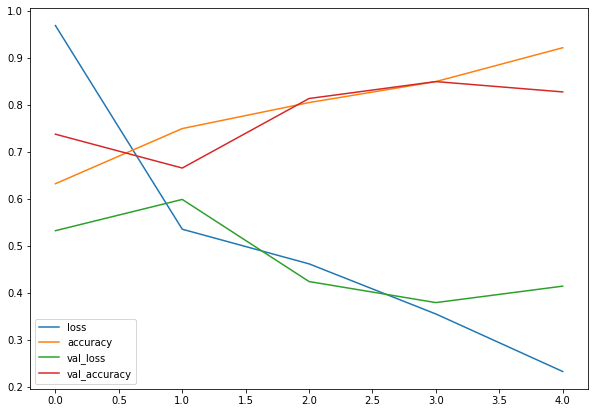

In [46]:
# Let's plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

In [47]:
# PLot the validation and training plot seperately
def plot_loss_curves(history):
  """
  Returns seperate loss curves for training and validation  metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs we ran for 

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel(" epochs")
  plt.legend()

**NOte:** When a model's **validation starts to increase**, it's likely that the model is **overfitting** the training datset. This means, it's learning the patterns in the training dataset **too well** and thus the model's ability to generalize to unseen data will be diminished.

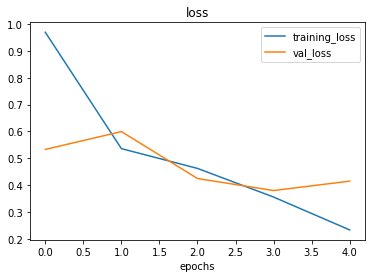

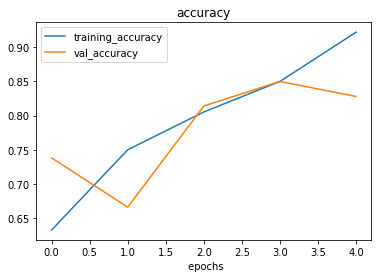

In [48]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 same
0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv learning
* Increase the number of conv filter
* Add another dense layers to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)

> **Note:** Reducing overfitting is also known as *regularization*

In [49]:
# Create the model( this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

** if conv layers finds features in an image, maxpool finds the most important parts of those features

In [52]:
#Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics="accuracy")

# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 187ms/step - loss: 0.6242 - accuracy: 0.6440 - val_loss: 0.4815 - val_accuracy: 0.7940
Epoch 2/5
47/47 [==============================] - 9s 184ms/step - loss: 0.4645 - accuracy: 0.7853 - val_loss: 0.3739 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 9s 184ms/step - loss: 0.4156 - accuracy: 0.8180 - val_loss: 0.4031 - val_accuracy: 0.8240
Epoch 4/5
47/47 [==============================] - 9s 202ms/step - loss: 0.4044 - accuracy: 0.8193 - val_loss: 0.3556 - val_accuracy: 0.8380
Epoch 5/5
47/47 [==============================] - 9s 182ms/step - loss: 0.3717 - accuracy: 0.8393 - val_loss: 0.3553 - val_accuracy: 0.8500


In [54]:
# Get a summary of our model with maxpooling
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

In [55]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_7 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


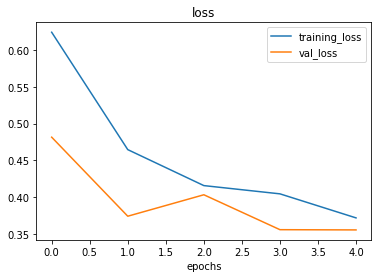

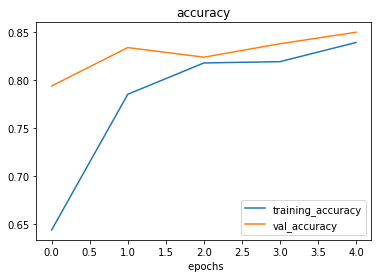

In [56]:
# Plot loss curves
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horzontal_flip=True)
# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)


**QuestionL** What is data augmentation?

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our model to learn more generalizable (hopefully) patterns. Altering might mean adjusting the rotation of an Image, flipping it, cropping it or something similar.

Let's write some code to visualize data augmentation.